# Feature Selection

–û–¥–∏–Ω –∏–∑ –≤–∞–∂–Ω—ã—Ö —ç—Ç–∞–ø–æ–≤ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ - –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ò–Ω–æ–≥–¥–∞ –∏—Ö –º–æ–∂–µ—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –º–Ω–æ–≥–æ - –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ, —á–µ–º –Ω—É–∂–Ω–æ –¥–ª—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π. –ù–∞ –ø—Ä–æ—à–ª—ã—Ö –∑–∞–Ω—è—Ç–∏—è—Ö –º—ã —É–∂–µ –ø–æ–∑–Ω–∞–∫–æ–º–∏–ª–∏—Å—å —Å –º–µ—Ç–æ–¥–æ–º –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, PCA, –∏ –≥–æ–≤–æ—Ä–∏–ª–∏ –æ –ø—Ä–æ–∫–ª—è—Ç–∏–∏ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏.

–ú—ã –∑–Ω–∞–µ–º –º–Ω–æ–≥–æ–µ –æ —Ç–æ–º, –∫–∞–∫ –æ—Ç–±–∏—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏. –í —ç—Ç–æ–π —Ç–µ—Ç—Ä–∞–¥–∫–µ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä—É–µ–º –Ω–∞—à–∏ –∑–Ω–∞–Ω–∏—è.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 0. Data

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ‚Ä¶ V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

Time        V1        V2        V3        V4        V5        V6  \
11258    19546.0 -0.454749 -4.054983 -0.273254 -0.399568 -2.590132 -0.393092   
78321    57475.0 -6.423197  1.072629 -3.820238 -0.269845 -4.125205 -0.690805   
226814  144808.0 -2.405207  2.943823 -7.616654  3.533374 -5.417494 -0.112632   
276476  167121.0 -0.454736  0.189683  0.839674 -0.810172  0.458127  0.106038   
174521  121948.0  0.014204  0.516012  0.248349 -0.307436  0.180279  1.025058   

              V7        V8        V9  ...       V21       V22       V23  \
11258   0.138466 -0.391686 -0.873562  ...  0.054097 -1.563757 -0.628145   
78321  -0.196968  2.840871 -0.307457  ...  0.011082  0.109586 -0.041425   
226814 -1.329372  1.709417 -2.322716  ...  0.652683  0.414132  0.023869   
276476  0.427228  0.195571 -1.232442  ... -0.136466  0.090678 -0.255906   
174521 -0.806851 -1.255250  0.843365  ...  1.673448  0.206028 -0.294641   

             V24       V25       V26       V27       V28   Amount  Class  
11258   0.457243 -0.338810 -0.653193 -0.184372  0.185015  1002.00      0  
78321   0.576822 -0.291755  0.837947 -0.077805 -0.788987   255.30      0  
226814 -0.260616  0.405316  0.029107  0.519807 -0.469537   667.55      1  
276476  0.628284  0.175469 -0.617653  0.147898  0.142017     9.94      0  
174521  0.199466  0.902569  0.829324  0.220143  0.262698     7.50      0  

[5 rows x 31 columns]

**–ó–∞–¥–∞–Ω–∏–µ** –î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ "—Ñ—Ä–æ–¥–∞" –≤ —ç—Ç–æ–π –≤—ã–±–æ—Ä–∫–µ?

In [213]:
sum(data.Class) / data.shape[0]

0.017010095422486517

In [67]:
data.shape

(28924, 31)

## 1. –ü–æ–∏—Å–∫ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

$$ R_j = \frac{1}{l}\sum \limits _{i=1}^{l}{(x_{ij} - \bar{x_j})^2}$$
- –ß–µ–º –±–æ–ª—å—à–µ $R_j$, —Ç–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–µ–µ –ø—Ä–∏–∑–Ω–∞–∫
- –ù–∏–∫–∞–∫ –Ω–µ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –æ—Ç–≤–µ—Ç—ã
- –ü–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã—Ö –∏ –±–ª–∏–∑–∫–∏—Ö –∫ –Ω–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

**–ó–∞–¥–∞–Ω–∏–µ** –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –¥–∏—Å–ø–µ—Ä—Å–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [216]:
data.var().sort_values()

Class     1.672133e-02
V28       1.195153e-01
V27       1.884534e-01
V26       2.315999e-01
V25       2.710506e-01
V23       3.195089e-01
V24       3.663248e-01
V22       5.507245e-01
V20       5.595187e-01
V19       6.871294e-01
V21       7.431351e-01
V15       8.322096e-01
V18       8.920157e-01
V13       9.975366e-01
V16       1.241883e+00
V11       1.350963e+00
V9        1.369498e+00
V6        1.819494e+00
V12       1.903163e+00
V14       1.911382e+00
V10       2.005135e+00
V8        2.049696e+00
V17       2.123134e+00
V4        2.392735e+00
V5        2.423572e+00
V7        2.719237e+00
V2        2.882808e+00
V3        3.747619e+00
V1        4.722414e+00
Amount    5.545650e+04
Time      2.258724e+09
dtype: float64

In [215]:
data.nunique()

Time      28793
V1        28690
V2        28690
V3        28690
V4        28690
V5        28690
V6        28690
V7        28690
V8        28690
V9        28690
V10       28690
V11       28690
V12       28690
V13       28690
V14       28690
V15       28690
V16       28690
V17       28690
V18       28690
V19       28690
V20       28690
V21       28690
V22       28690
V23       28690
V24       28690
V25       28690
V26       28690
V27       28690
V28       28690
Amount     8890
Class         2
dtype: int64

## 2. –ü–æ–∏—Å–∫ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


$$ R_j = \frac{\sum \limits _{i=1}^{l}{(x_{ij} - \bar{x_j})(y_i - \bar{y})}}{\sqrt{\sum \limits _{i=1}^{l}{(x_{ij} - \bar{x_j})^2} \sum \limits _{i=1}^{l}{(y_i - \bar{y})^2} }}$$
- –ß–µ–º –±–æ–ª—å—à–µ $|R_j|$, —Ç–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–µ–µ –ø—Ä–∏–∑–Ω–∞–∫
- –£—á–∏—Ç—ã–≤–∞–µ—Ç —Ç–æ–ª—å–∫–æ –ª–∏–Ω–µ–π–Ω—É—é —Å–≤—è–∑—å

**–ó–∞–¥–∞–Ω–∏–µ**: —Å–æ—Å—Ç–∞–≤—å—Ç–µ –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –µ–µ. 
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ, –µ—Å—Ç—å –ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ —É–¥–∞–ª–µ–Ω–∏–∏ –∫–∞–∫–∏—Ö-–ª–∏–±–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

<AxesSubplot:>

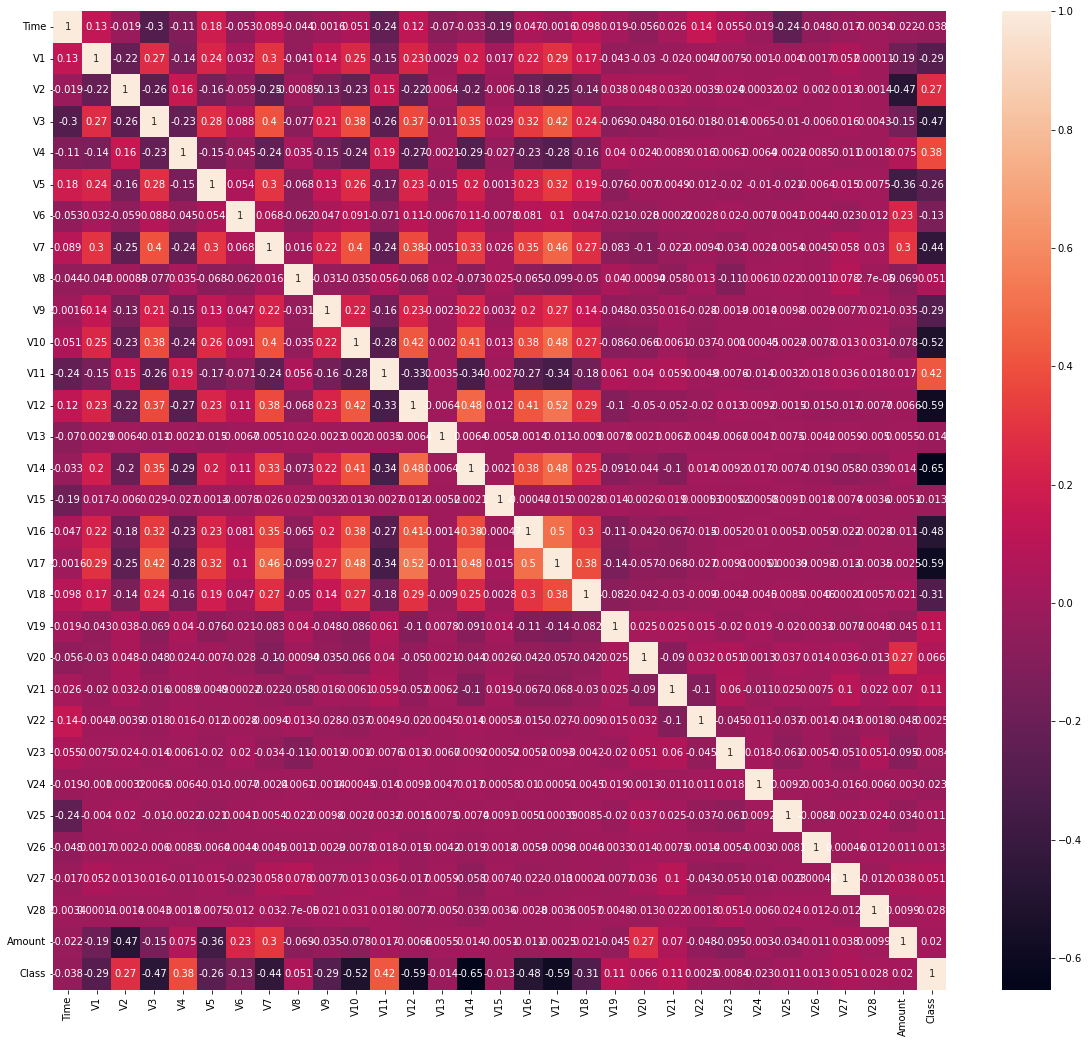

In [78]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True)

In [239]:
features_corr = ['V14', 'V11', 'V9']

## 3. –û—Ü–µ–Ω–∫–∞ T-score

$$ R_j = \frac{|\mu_1 - \mu_2|} {\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} }} $$

- –î–ª—è –∑–∞–¥–∞—á –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
- –ß–µ–º –±–æ–ª—å—à–µ $ùëÖ_ùëó$, —Ç–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–µ–µ –ø—Ä–∏–∑–Ω–∞–∫
- $\mu_1, \mu_2$ ‚Äî —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ø–µ—Ä–≤–æ–º –∏ –≤—Ç–æ—Ä–æ–º –∫–ª–∞—Å—Å–∞—Ö
- $\sigma_1^2, \sigma_2^2$ - –¥–∏—Å–ø–µ—Ä—Å–∏–∏
- $n_1, n_2$ - —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –ø–µ—Ä–≤–æ–º –∏ –≤—Ç–æ—Ä–æ–º –∫–ª–∞—Å—Å–∞—Ö

**–ó–∞–¥–∞–Ω–∏–µ**: –Ω–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—â—É—é T-score

In [84]:
def get_t_score(column, target):
    mask = target == 1
    dif = np.abs(column[mask].mean() - column[~mask].mean())
    sq = np.sqrt(column[mask].var()/len(column[mask]) + column[~mask].var()/len(column[~mask])) 
    
    return dif/sq

**–ó–∞–¥–∞–Ω–∏–µ**: –†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ t_scores –¥–ª—è –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [101]:
t_scores = []
for feat in data.columns[:-1]:
    t_scores.append(get_t_score(data[feat], data.Class))
    
t_scores = pd.DataFrame(t_scores,index=data.columns[:-1]).sort_values(0, ascending=False)
t_scores

0
V14     36.211351
V4      34.940966
V11     31.434558
V12     29.903904
V10     25.764833
V16     23.785926
V9      22.890843
V3      21.939941
V17     21.252745
V2      18.634706
V7      17.187015
V18     17.125340
V6      16.699304
V1      15.651240
V5      12.998731
V19      9.811052
Time     6.478489
V20      6.298218
V24      4.519228
V21      4.097345
V28      3.056515
Amount   3.048258
V27      2.749547
V26      2.329477
V13      2.212269
V15      1.862716
V8       1.841339
V25      1.190782
V23      0.512865
V22      0.216344

**–ó–∞–¥–∞–Ω–∏–µ**: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –≤–∏–¥–µ —Å—Ç–æ–ª–±—Ü–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã

<AxesSubplot:>

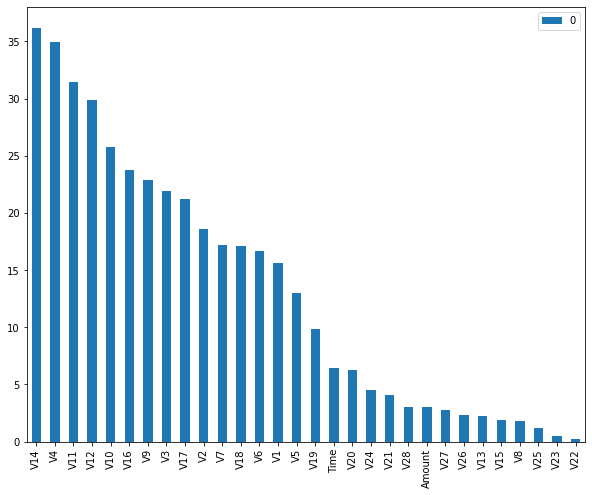

In [137]:
t_scores.plot.bar(figsize=(10,8))

**–ó–∞–¥–∞–Ω–∏–µ**: —Å–æ—Å—Ç–∞–≤—å—Ç–µ —Å–ø–∏—Å–æ–∫ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –°–æ–±–µ—Ä–∏—Ç–µ –≤ –Ω–µ–±–æ–ª—å—à—É—é —Ñ—É–Ω–∫—Ü–∏—é eliminate_features —Å –¥–≤—É–º—è –∞—Ä–≥—É–º–µ–Ω—Ç–∞–º–∏: 
- features
- eliminated_features

–°–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π features_list_tscore

In [237]:
features_list_tscore = t_scores[:5].index

## 4. –û—Ç–±–æ—Ä —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–µ–π

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

**–ó–∞–¥–∞–Ω–∏–µ**: —Ä–∞–∑–¥–µ–ª–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏ —Å–æ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–µ–π –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [221]:
X = data.iloc[:,:-1]
y = data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [222]:
X_train.shape, X_test.shape

((21693, 30), (7231, 30))

In [223]:
sum(y_test)/len(y_test), sum(y_train)/len(y_train)

(0.017010095422486517, 0.017010095422486517)

In [224]:
features=data.columns[:-1]

In [225]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test_scaled =  pd.DataFrame(scaler.transform(X_test), columns=features)

### –û—Ç–±–æ—Ä —Å –ø–æ–º–æ—â—å—é –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π

–ï—Å–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω—ã, —Ç–æ –≤–µ—Å–∞ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞–∫ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏!

–û–¥–Ω–∞–∫–æ —ç—Ç–æ –Ω–µ –≤—Å–µ. –ú—ã –∏–∑—É—á–∞–ª–∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä—ã - $L_1$ –∏ $L_2$

$$Q(a,X) + \lambda \sum \limits_{j=1}^{d}{|w_j| \rightarrow \min_w}$$

- –ß–µ–º –≤—ã—à–µ $\lambda$, —Ç–µ–º –±–æ–ª—å—à–µ –≤–µ—Å–æ–≤ –∑–∞–Ω—É–ª—è–µ—Ç—Å—è
- –ü–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –∏—Å–ø–æ–ª—å–∑—É—é—â—É—é —Ç–æ–ª—å–∫–æ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

**–ó–∞–¥–∞–Ω–∏–µ**: –û–±—É—á–∏–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –∞—Ä–≥—É–º–µ–Ω—Ç–∞–º–∏ 
- penalty='l1'
- solver='liblinear'

In [227]:
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [229]:
lr_coefs = pd.DataFrame(lr.coef_, columns=features).T.sort_values(0)
lr_coefs

0
V14    -0.916388
V10    -0.702771
V12    -0.498928
V8     -0.356037
V16    -0.338847
V13    -0.313295
V26    -0.291992
V7     -0.192348
V20    -0.179599
V6     -0.170010
Time   -0.140984
V17    -0.135963
V27    -0.105118
V23    -0.100834
V15    -0.036667
V3     -0.022322
V19    -0.018801
V28    -0.016025
V24    -0.009540
V9      0.000000
V2      0.008039
V18     0.040312
V25     0.091857
V11     0.147304
V1      0.210834
V21     0.222231
V5      0.249717
Amount  0.328146
V22     0.354102
V4      1.088027

**–ó–∞–¥–∞–Ω–∏–µ**: –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –≤–∏–¥–µ —Å—Ç–æ–ª–±—Ü–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã

<AxesSubplot:>

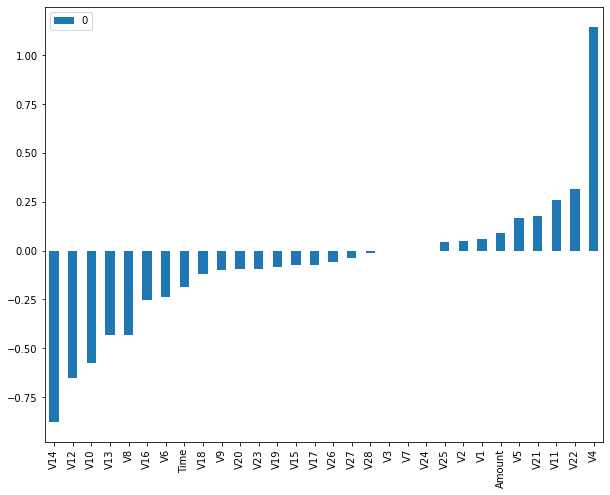

In [207]:
lr_coefs.plot.bar(figsize=(10,8))

**–ó–∞–¥–∞–Ω–∏–µ**: —Å–æ—Å—Ç–∞–≤—å—Ç–µ —Å–ø–∏—Å–æ–∫ —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö —Ñ–∏—á–µ–π –ø–æ –≤–µ—Ä—Å–∏–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ features_list_lr

In [245]:
features_list_lr = ['V14', 'V4', 'V12', 'V10', 'V13', 'V8']

### –û—Ç–±–æ—Ä —Å–ª—É—á–∞–π–Ω—ã–º –ª–µ—Å–æ–º

–ü–æ–∏—Å–∫ –Ω–∞–∏–ª—É—á—à–µ–≥–æ —Ä–∞–∑–±–∏–µ–Ω–∏—è:
$$ Q(X_m, j, t) = H(X_m) - \frac{|X_l|}{|X_m|}H(X_l) - \frac{|X_r|}{|X_m|}H(X_r) \rightarrow \max_{j,t}$$

$H(X)$ - –∫—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏

–î–ª—è *—Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞*:
- –ß–µ–º —Å–∏–ª—å–Ω–µ–µ —É–º–µ–Ω—å—à–∏–ª–∏ $ùêª(ùëã)$, —Ç–µ–º –ª—É—á—à–µ –ø—Ä–∏–∑–Ω–∞–∫
- –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞ $ùëÖ_ùëó$: –ø—Ä–æ—Å—É–º–º–∏—Ä—É–µ–º —É–º–µ–Ω—å—à–µ–Ω–∏—è –ø–æ –≤—Å–µ–º –≤–µ—Ä—à–∏–Ω–∞–º, –≥–¥–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –¥–µ–ª–∞–ª–æ—Å—å –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É ùëó

–î–ª—è *—Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞*:

- –°—É–º–º–∞ –≤–∞–∂–Ω–æ—Å—Ç–µ–π $ùëÖ_ùëó$ –ø–æ –≤—Å–µ–º –¥–µ—Ä–µ–≤—å—è–º
- –ß–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –≤–∞–∂–Ω–µ–µ –ø—Ä–∏–∑–Ω–∞–∫
- –£—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏

**–ó–∞–¥–∞–Ω–∏–µ**: –û–±—É—á–∏–º —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å

In [230]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=5)

In [231]:
rf_coefs = pd.DataFrame(rf.feature_importances_, index=features).sort_values(0)
rf_coefs

0
V24     0.000705
V15     0.000882
V13     0.001060
V20     0.001201
Time    0.001294
V26     0.001300
V22     0.001360
V23     0.001425
Amount  0.001830
V27     0.002014
V25     0.002235
V19     0.002658
V8      0.003558
V2      0.004046
V28     0.004489
V21     0.004823
V5      0.005157
V1      0.005809
V6      0.005813
V9      0.022507
V7      0.030184
V18     0.030293
V4      0.030933
V3      0.045592
V16     0.084855
V10     0.102300
V11     0.104859
V12     0.128634
V17     0.182321
V14     0.185864

**–ó–∞–¥–∞–Ω–∏–µ**: –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –≤–∏–¥–µ —Å—Ç–æ–ª–±—Ü–æ–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã

<AxesSubplot:>

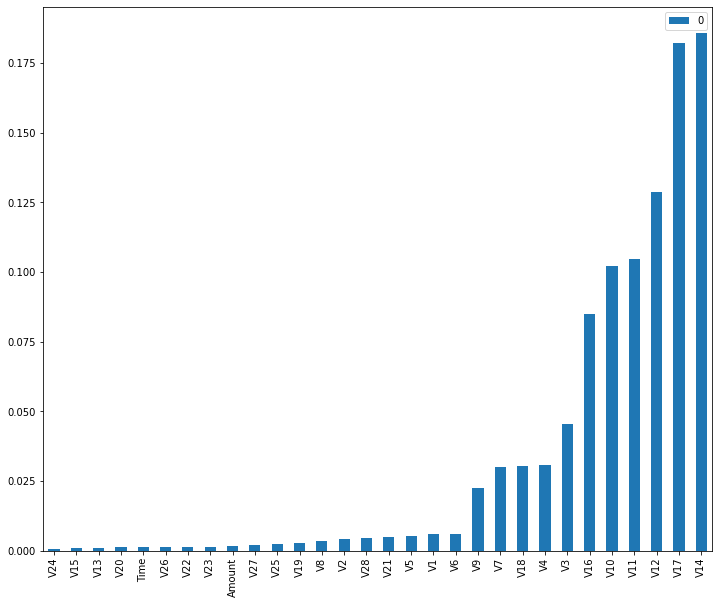

In [232]:
rf_coefs.plot.bar(figsize=(12,10))

**–ó–∞–¥–∞–Ω–∏–µ**: —Å–æ—Å—Ç–∞–≤—å—Ç–µ —Å–ø–∏—Å–æ–∫ —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö —Ñ–∏—á–µ–π –ø–æ –≤–µ—Ä—Å–∏–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ features_list_rf

## 5. –ë—É–¥–µ–º —É—á–∏—Ç—å –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –≥—Ä—É–ø–ø–∞—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

**–ó–∞–¥–∞–Ω–∏–µ**: –¥–∞–≤–∞–π—Ç–µ —Å–æ–±–µ—Ä–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. –ü–æ–¥–∞–¥–∏–º –µ–π:
- model
- X_train
- X_test
- y_train
- y_test
- features: –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
<br> 
–í –æ—Ç–≤–µ—Ç –æ–Ω–∞ –Ω–∞–º –≤–µ—Ä–Ω–µ—Ç: –º–æ–¥–µ–ª—å –∏ –∑–Ω–∞—á–µ–Ω–∏–µ roc_auc

In [291]:
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix

def train(model, X_train, X_test, y_train, y_test, features):
    
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[features]), columns=features)
    X_test_scaled =  pd.DataFrame(scaler.transform(X_test[features]), columns=features)
    
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    print('Train:', classification_report(y_train, y_pred_train))
    print('Test:', classification_report(y_test, y_pred_test))
    
    precision, recall, thresholds = precision_recall_curve(y_train, y_pred_train)
    auc_precision_recall_train = auc(recall, precision)
    print(f'Train ROC AUC: {roc_auc_score(y_train, y_pred_train):.2}, PR AUC: {auc_precision_recall_train:.2}')
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)
    auc_precision_recall_test = auc(recall, precision)
    print(f'Test ROC AUC: {roc_auc_score(y_test, y_pred_test):.2}, PR AUC: {auc_precision_recall_test:.2}')

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
    
    return auc_precision_recall_test


**–ó–∞–¥–∞–Ω–∏–µ**: –ü—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –æ–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21324
           1       0.94      0.76      0.84       369

    accuracy                           1.00     21693
   macro avg       0.97      0.88      0.92     21693
weighted avg       0.99      1.00      0.99     21693

Test:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7108
           1       0.91      0.70      0.79       123

    accuracy                           0.99      7231
   macro avg       0.95      0.85      0.89      7231
weighted avg       0.99      0.99      0.99      7231

Train ROC AUC: 0.88, PR AUC: 0.85
Test ROC AUC: 0.85, PR AUC: 0.8


0.8047835038686368

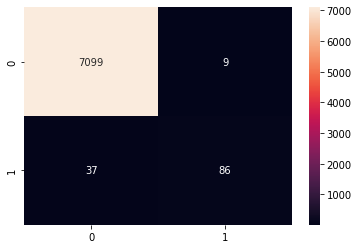

In [292]:
lr = LogisticRegression(penalty='l2',solver='liblinear')

train(lr, X_train, X_test, y_train, y_test, features_list_tscore[:3])


Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21324
           1       0.97      0.77      0.85       369

    accuracy                           1.00     21693
   macro avg       0.98      0.88      0.93     21693
weighted avg       1.00      1.00      1.00     21693

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7108
           1       0.98      0.72      0.83       123

    accuracy                           1.00      7231
   macro avg       0.99      0.86      0.91      7231
weighted avg       0.99      1.00      0.99      7231

Train ROC AUC: 0.88, PR AUC: 0.87
Test ROC AUC: 0.86, PR AUC: 0.85


0.8531505956953979

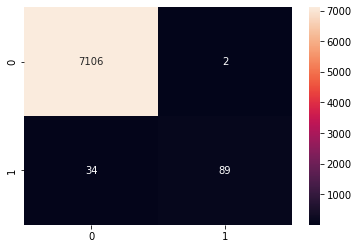

In [293]:

lr = LogisticRegression(penalty='l2',solver='liblinear')

train(lr, X_train, X_test, y_train, y_test, features_corr)


**–ó–∞–¥–∞–Ω–∏–µ**: –ü—Ä–∏–º–µ–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –æ–±—É—á–∏—Ç–µ —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å –Ω–∞ —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21324
           1       0.98      0.81      0.89       369

    accuracy                           1.00     21693
   macro avg       0.99      0.90      0.94     21693
weighted avg       1.00      1.00      1.00     21693

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7108
           1       0.97      0.79      0.87       123

    accuracy                           1.00      7231
   macro avg       0.98      0.89      0.93      7231
weighted avg       1.00      1.00      1.00      7231

Train ROC AUC: 0.9, PR AUC: 0.9
Test ROC AUC: 0.89, PR AUC: 0.88


0.8811067580527832

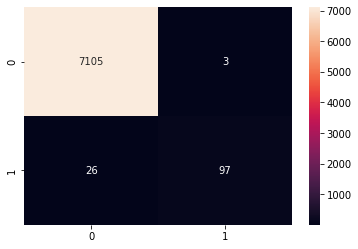

In [294]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5)
train(rf, X_train, X_test, y_train, y_test, features_corr)

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21324
           1       0.98      0.83      0.90       369

    accuracy                           1.00     21693
   macro avg       0.99      0.92      0.95     21693
weighted avg       1.00      1.00      1.00     21693

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7108
           1       0.98      0.80      0.88       123

    accuracy                           1.00      7231
   macro avg       0.99      0.90      0.94      7231
weighted avg       1.00      1.00      1.00      7231

Train ROC AUC: 0.92, PR AUC: 0.91
Test ROC AUC: 0.9, PR AUC: 0.89


0.89010265197383

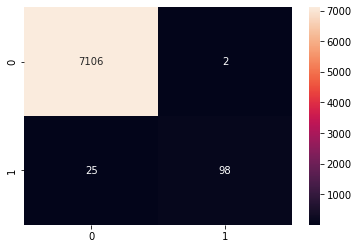

In [297]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5)
train(rf, X_train, X_test, y_train, y_test, features_list_tscore[:5])

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21324
           1       0.98      0.83      0.90       369

    accuracy                           1.00     21693
   macro avg       0.99      0.92      0.95     21693
weighted avg       1.00      1.00      1.00     21693

Test:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7108
           1       0.98      0.80      0.88       123

    accuracy                           1.00      7231
   macro avg       0.99      0.90      0.94      7231
weighted avg       1.00      1.00      1.00      7231

Train ROC AUC: 0.92, PR AUC: 0.91
Test ROC AUC: 0.9, PR AUC: 0.89


0.89010265197383

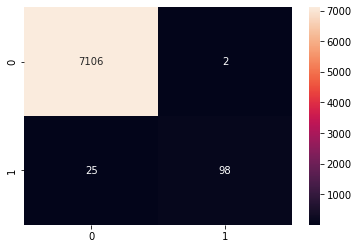

In [296]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5)
train(rf, X_train, X_test, y_train, y_test, features_list_lr )
